# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import *

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuy hoa
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | soweto
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | walvis bay
Processing Record 7 of Set 1 | yemva
Processing Record 8 of Set 1 | vilyuchinsk
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | visby
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | tofol
Processing Record 21 of Set 1 | afaahiti
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | alotau

Processing Record 38 of Set 3 | kingscliff
Processing Record 39 of Set 3 | inhambane
Processing Record 40 of Set 3 | takanosu
Processing Record 41 of Set 3 | sheridan
Processing Record 42 of Set 3 | carutapera
Processing Record 43 of Set 3 | uturoa
Processing Record 44 of Set 3 | wailua homesteads
Processing Record 45 of Set 3 | ciudad acuna
Processing Record 46 of Set 3 | west island


In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,14.89,72,3,3.58,ZA,2023-07-27 08:39:04
1,ilulissat,69.2167,-51.1000,8.01,71,75,2.06,GL,2023-07-27 08:39:04
2,hola,51.5377,23.1902,17.10,53,52,5.41,PL,2023-07-27 08:39:04
3,adamstown,-25.0660,-130.1015,19.43,60,10,2.78,PN,2023-07-27 08:39:04
4,okhotsk,59.3833,143.3000,16.41,90,35,3.78,RU,2023-07-27 08:39:05


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,14.89,72,3,3.58,ZA,2023-07-27 08:39:04
1,ilulissat,69.2167,-51.1000,8.01,71,75,2.06,GL,2023-07-27 08:39:04
2,hola,51.5377,23.1902,17.10,53,52,5.41,PL,2023-07-27 08:39:04
3,adamstown,-25.0660,-130.1015,19.43,60,10,2.78,PN,2023-07-27 08:39:04
4,okhotsk,59.3833,143.3000,16.41,90,35,3.78,RU,2023-07-27 08:39:05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

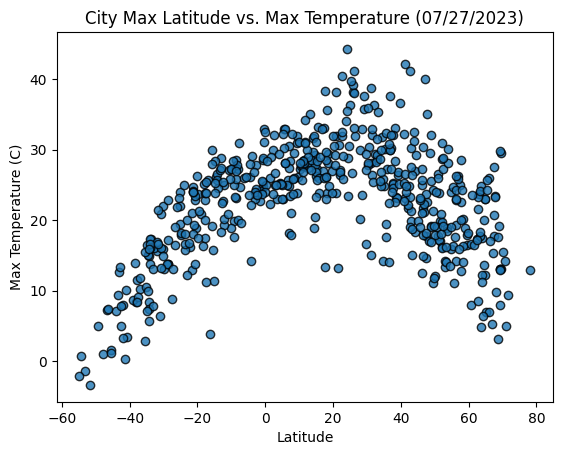

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, 
            marker="o", 
            alpha=0.8, label="Cities")

# Get current date
now = datetime.now()
month = now.strftime('%m')
day = now.strftime('%d')
year = now.strftime('%Y')

# Incorporate other graph properties
plt.title(f"City Max Latitude vs. Max Temperature ({month}/{day}/{year})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

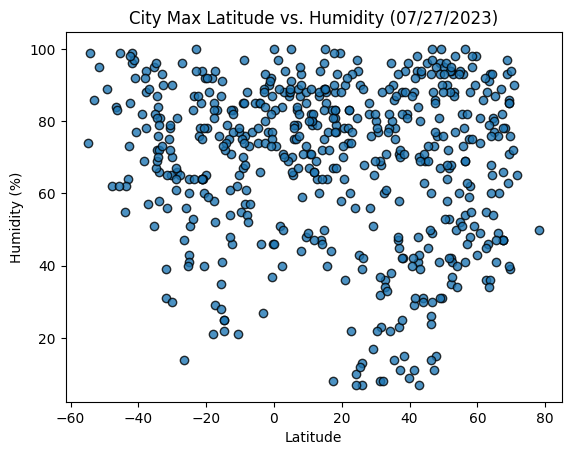

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({month}/{day}/{year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

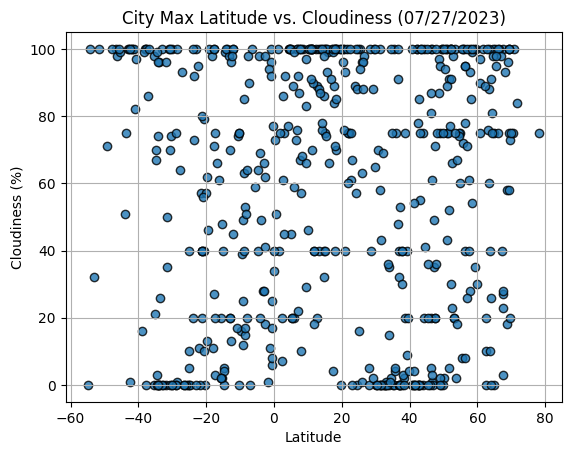

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({month}/{day}/{year})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

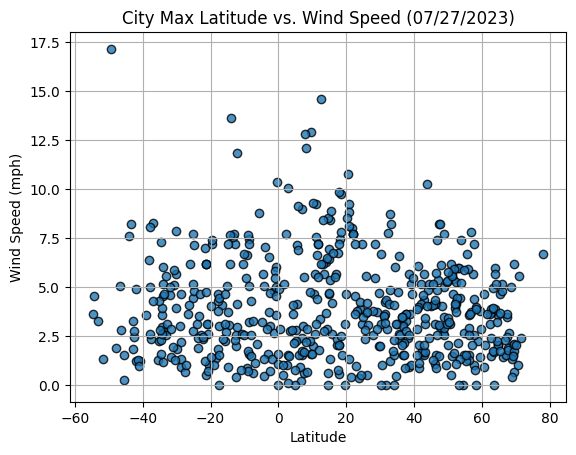

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({month}/{day}/{year})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, text_coordinates, x_label, y_label):
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values,y_values)
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Print r square value
    print(f"R squared: {rvalue**2}")
    
    # Show plot
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,69.2167,-51.1000,8.01,71,75,2.06,GL,2023-07-27 08:39:04
2,hola,51.5377,23.1902,17.10,53,52,5.41,PL,2023-07-27 08:39:04
4,okhotsk,59.3833,143.3000,16.41,90,35,3.78,RU,2023-07-27 08:39:05
8,bandarbeyla,9.4942,50.8122,31.01,48,29,12.91,SO,2023-07-27 08:39:05
9,haiku-pauwela,20.9219,-156.3051,23.91,90,40,9.26,US,2023-07-27 08:39:05


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,14.89,72,3,3.58,ZA,2023-07-27 08:39:04
3,adamstown,-25.0660,-130.1015,19.43,60,10,2.78,PN,2023-07-27 08:39:04
5,edinburgh of the seven seas,-37.0676,-12.3116,10.24,57,86,8.28,SH,2023-07-27 08:39:05
6,waitangi,-43.9535,-176.5597,7.12,55,51,7.59,NZ,2023-07-27 08:39:05
7,punta arenas,-53.1500,-70.9167,-1.49,86,32,3.29,CL,2023-07-27 08:39:05


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.2936950046719721


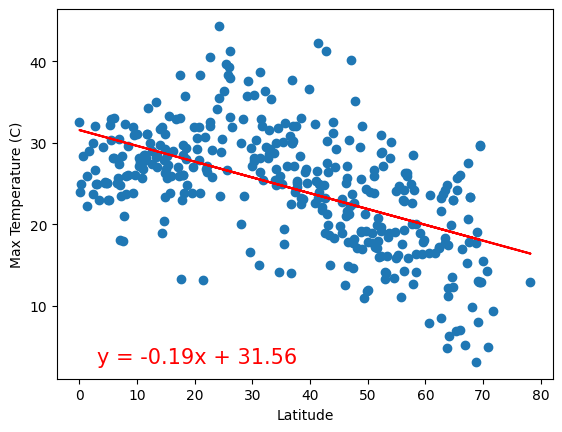

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Linear Regression", (3,3), 'Latitude', 'Max Temperature (C)')

R squared: 0.695814363969955


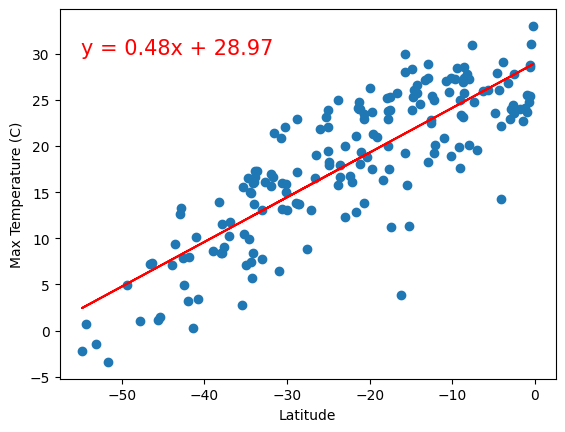

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Linear Regression", (-55,30), 'Latitude', 'Max Temperature (C)')

**Discussion about the linear relationship:**
- There is a strong negative correlation between temperature and latitude in the Northern Hemisphere. And it's vice-versa for the Southern Hemisphere: there is a strong positive correlation between temperature and latitude.
- The correlation between humidity/cloudiness and latitude is weak in both hemispheres.
- The correlation between wind speed and latitude is a little weak in the Northern Hemisphere and very weak in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.008218506251261429


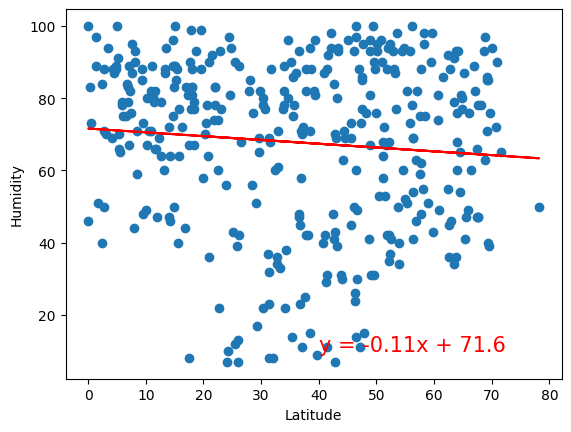

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, "Linear Regression", (40,10), 'Latitude', 'Humidity')

R squared: 0.022667602828843263


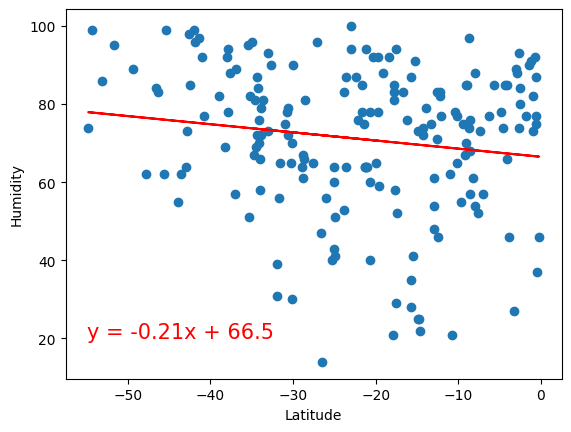

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, "Linear Regression", (-55,20), 'Latitude', 'Humidity')

**Discussion about the linear relationship:** 
- In the Northern Hemisphere, the temperature is negatively correlated with latitude. The further north you go, the lower the temperature.
- It also seems that the humidity "levels out" at around 60% as you move further north.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.0075700772436981655


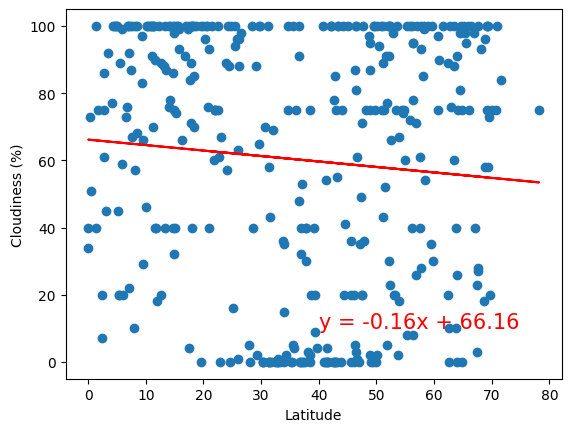

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, "Linear Regression", (40,10), 'Latitude', 'Cloudiness (%)')

R squared: 0.018403116832793703


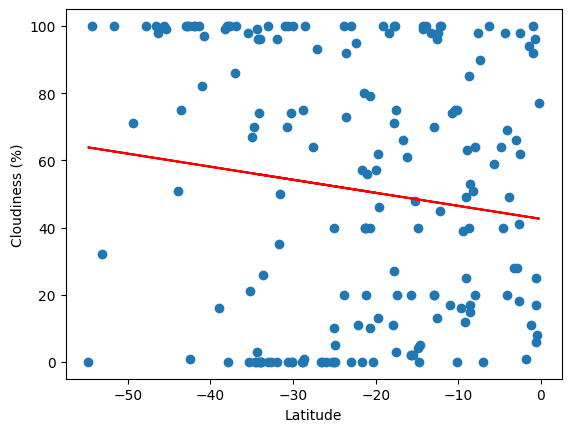

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, "Linear Regression", (40,10), 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:**
- The linear regression models for both hemispheres show a very weak correlation between latitude and cloudiness. The r-squared values are 0.006 and 0.023 for the northern and southern hemispheres, respectively. This means that only 0.6% and 2.3% of the variation in cloudiness can be explained by the latitude of the city.
- You can also tell just based on the distribution of the points alone that it's not particularly uniform. There are a lot of cities with 0% cloudiness and 100% cloudiness, and not a lot in between. This is likely due to the fact that cloudiness is a qualitative measure, and not a quantitative one. It's also possible that the data is not very accurate, since it's based on a single measurement at a single point in time.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.03106898162981255

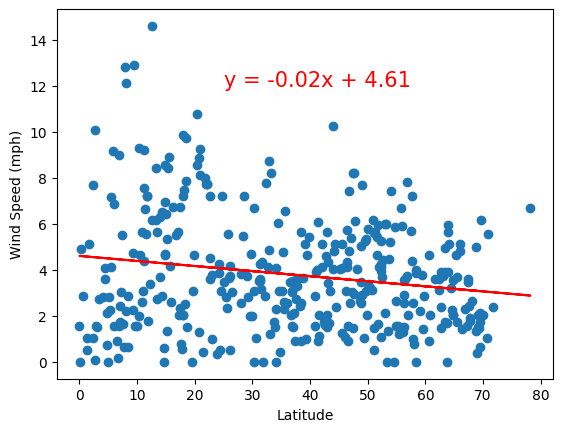

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, "Linear Regression", (25,12), 'Latitude', 'Wind Speed (mph)')

R squared: 0.001170418906929455


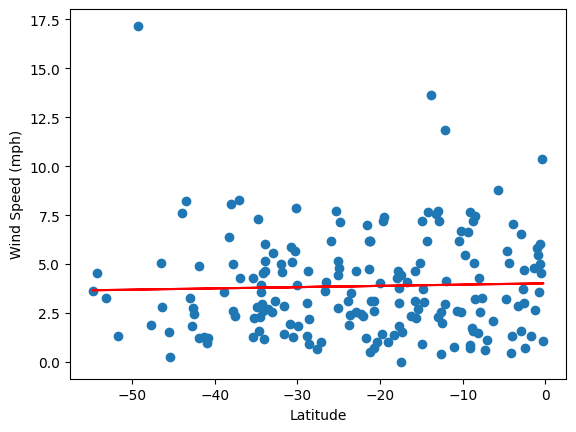

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, "Linear Regression", (25,12), 'Latitude', 'Wind Speed (mph)')

**Discussion about the linear relationship:**
- The linear regression model for both the Northern and Southern Hemisphere shows a weak negative correlation between latitude and max temperature.
- This could be because the data is not normally distributed. The data is skewed to the right, which means that the mean is greater than the median. This is because the data is bounded on the left by 0 degrees latitude.